# MOVIE RATING PREDICTION

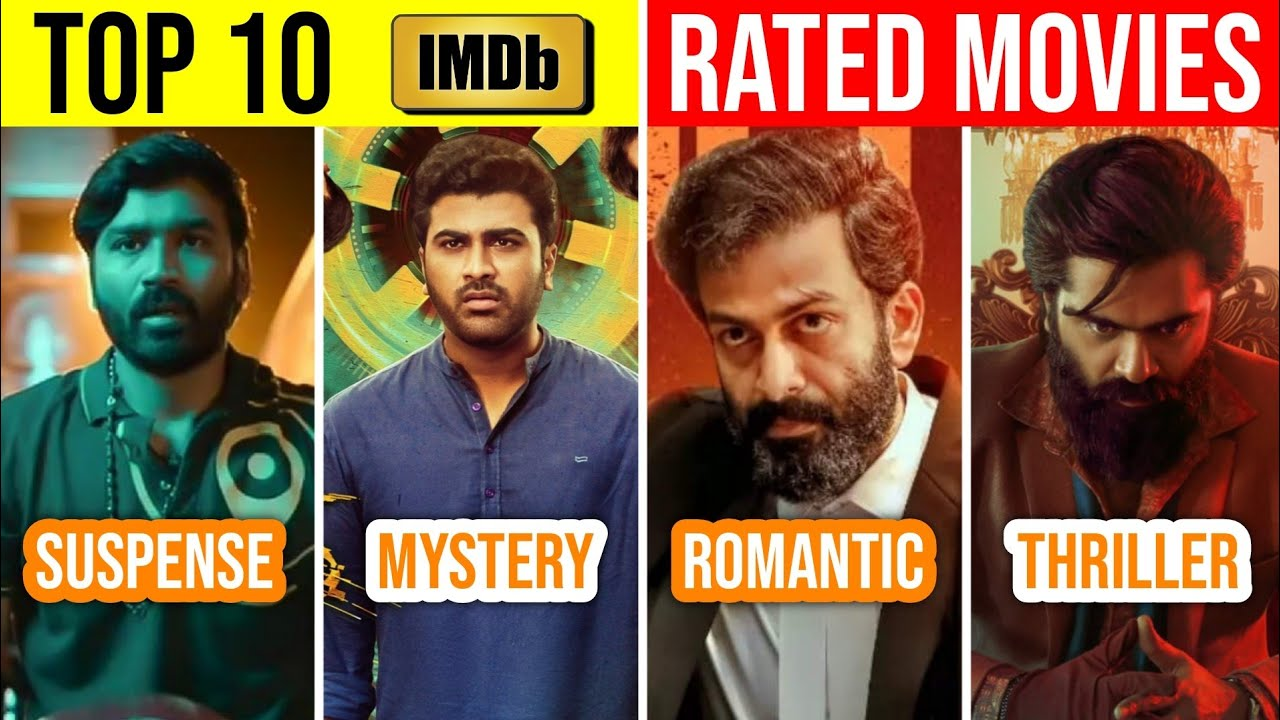

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rating_prediction=pd.read_csv("C:/Users/91784/Downloads/ratingprediction.csv",encoding='latin1')

In [4]:
rating_prediction

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rating_prediction.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
rating_prediction.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
rating_prediction.shape

(15509, 10)

In [8]:
rating_prediction.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
rating_prediction.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
rating_prediction.duplicated().sum()

6

In [11]:
rating_prediction.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [12]:
rating_prediction.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
rating_prediction.dropna(inplace = True)

In [14]:
rating_prediction.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
rating_prediction.shape

(5659, 10)

In [16]:
rating_prediction['Duration'] = rating_prediction['Duration'].str.extract('(\d+)')
rating_prediction['Duration'] = pd.to_numeric(rating_prediction['Duration'], errors='coerce')

In [17]:
rating_prediction["Duration"].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [18]:
genre = rating_prediction['Genre']

In [19]:
genre.head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [20]:
genres =rating_prediction['Genre'].str.split(', ', expand=True)

In [21]:
genres.head()

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [22]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [23]:
genresPie = rating_prediction['Genre'].value_counts()

In [24]:
genresPie.head()

Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: Genre, dtype: int64

In [25]:
rating_prediction['Votes'] = rating_prediction['Votes'].str.replace(',', '').astype(int)

In [26]:
rating_prediction['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [27]:
directors = rating_prediction["Director"].value_counts()

In [28]:
directors.head()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [29]:
actors = pd.concat([ rating_prediction['Actor 1'],rating_prediction['Actor 2'],  rating_prediction['Actor 3']]).dropna().value_counts()

In [30]:
actors.head()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

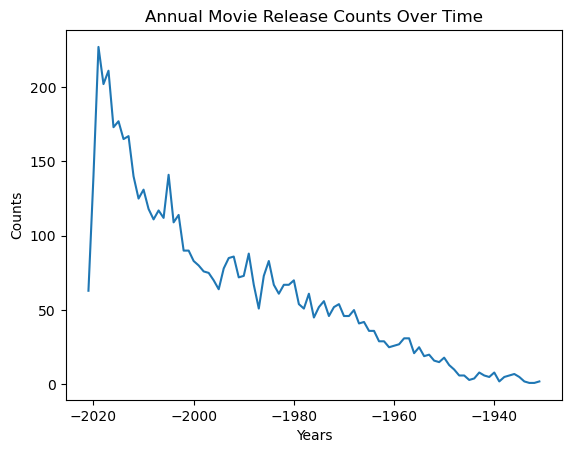

In [31]:
#TO CONNECT INDIVIDUAL DATAPOINTS
ax = sb.lineplot(data= rating_prediction['Year'].value_counts().sort_index())
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
mpl.show()

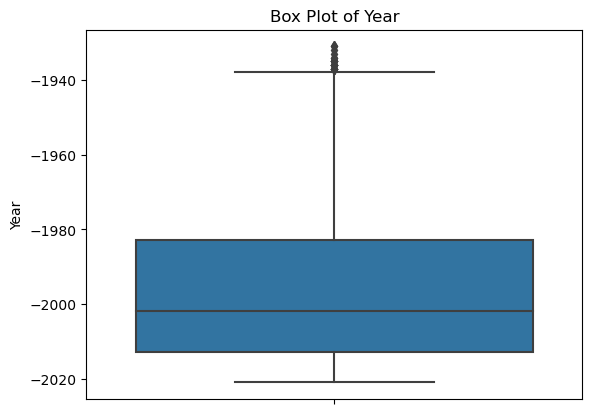

In [32]:
#TO VISUALIZE DISTRIBUTIONS
ax = sb.boxplot(data= rating_prediction, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()

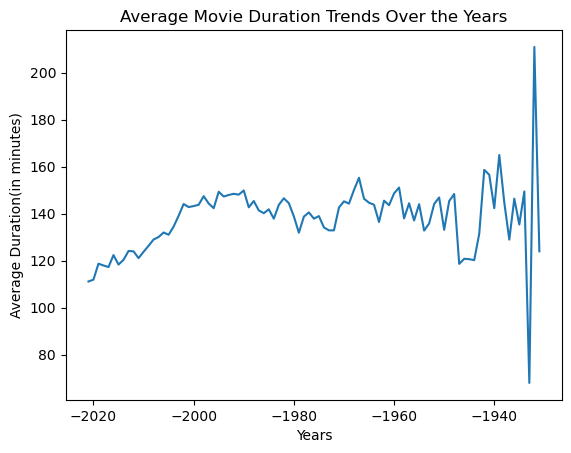

In [33]:
#TO COONECT THE DATAPOINTS BETWEEN YEARS AND DURATION
ax = sb.lineplot(data=rating_prediction.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

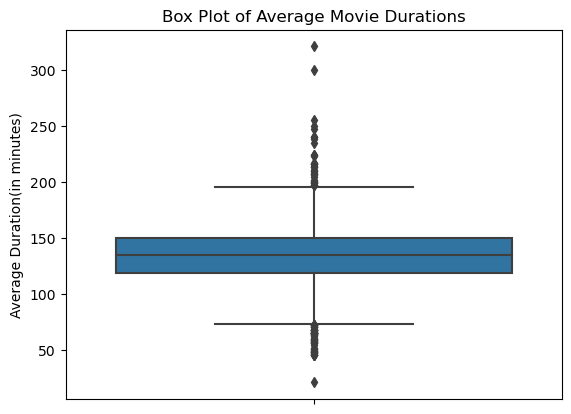

In [34]:
#TO VISUALIZE DURATION DISTRIBUTIONS
ax = sb.boxplot(data=rating_prediction, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

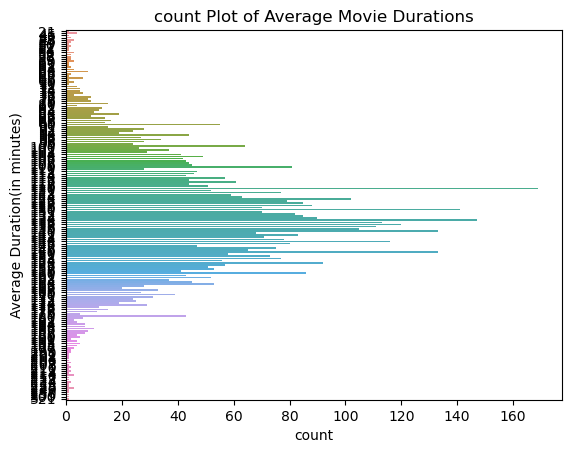

In [35]:
#TO VISUALIZE DURATION DISTRIBUTIONS
ax = sb.countplot(data=rating_prediction, y='Duration')
ax.set_title("count Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

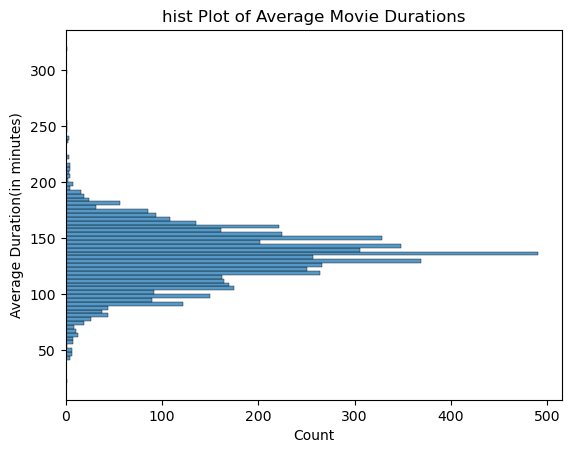

In [36]:
#TO VISUALIZE DURATION DISTRIBUTIONS
ax = sb.histplot(data=rating_prediction, y='Duration')
ax.set_title("hist Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [37]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'DURATION' COLUMN
Q1 =  rating_prediction['Duration'].quantile(0.25)
Q3 =rating_prediction['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = rating_prediction[(rating_prediction['Duration'] >= lower_bound) & (rating_prediction['Duration'] <= upper_bound)]
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


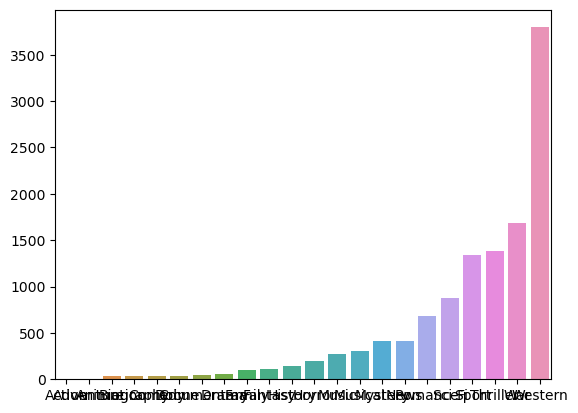

In [38]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
mpl.show()

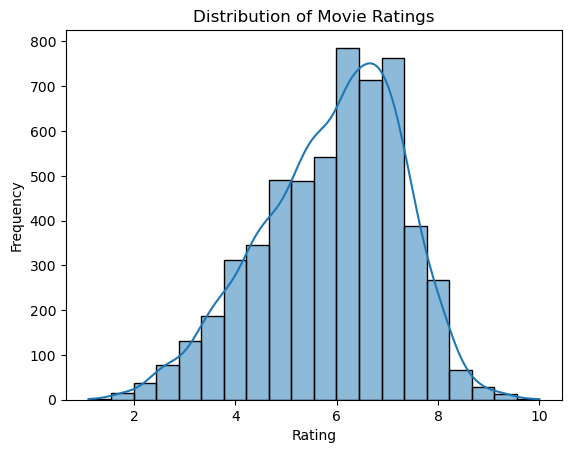

In [39]:
#TO VISUALIZE RELATIONSHIP BETWEEN RATING AND FREQUENCY
ax = sb.histplot(data = rating_prediction, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
mpl.show()

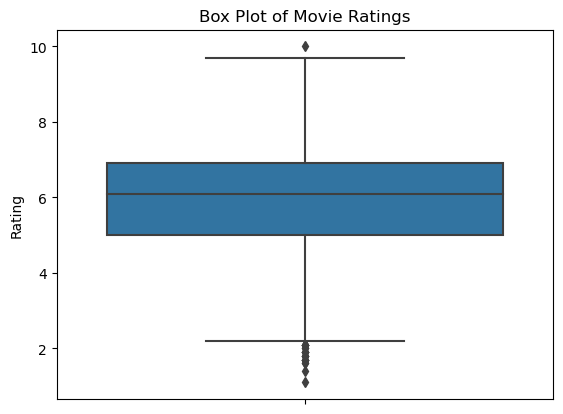

In [40]:
#TO VISUALIZE RATING DISTRIBUTIONS
ax = sb.boxplot(data=rating_prediction, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()

In [41]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'RATING' COLUMN
Q1 = rating_prediction['Rating'].quantile(0.25)
Q3 = rating_prediction['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = rating_prediction[(rating_prediction['Rating'] >= lower_bound) & (rating_prediction['Rating'] <= upper_bound)]
movie_file.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


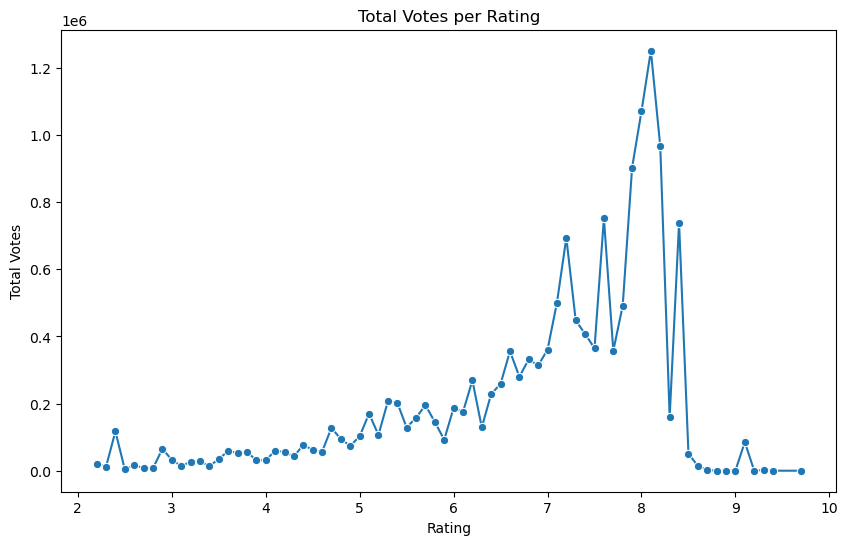

In [42]:
#CREATING A FIGURE OF LINEPLOT BASED ON RATING AND VOTES
rating_votes = movie_file.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()

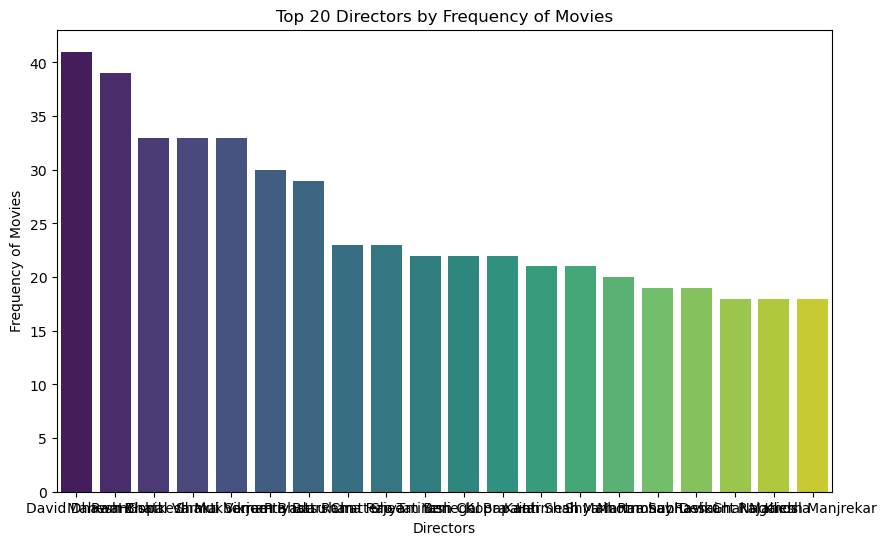

In [43]:
#CREATING A FIGURE OF BARPLOT BASED ON DIRECTOR AND FREQUENCY OF MOVIES
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
mpl.show(11)

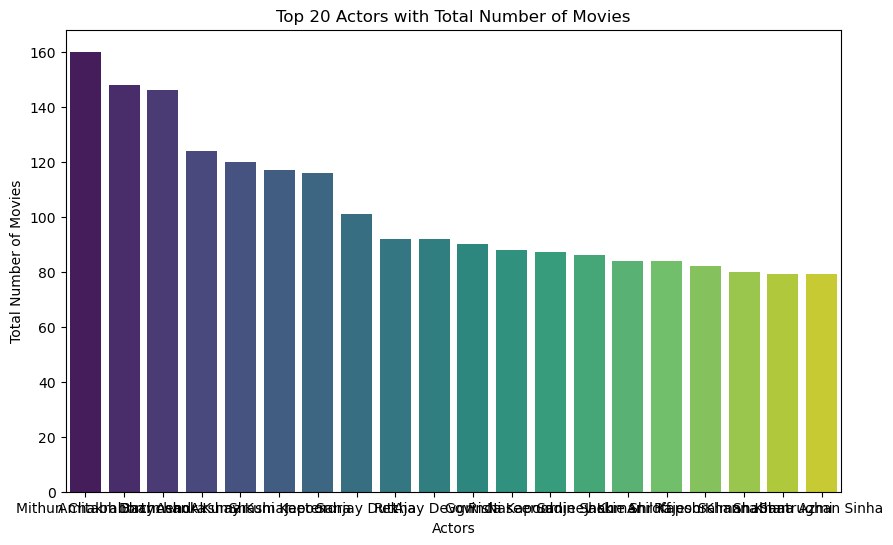

In [44]:
#CREATING A FIGURE OF BARPLOT BASED ON ACTORS AND TOTAL NO OF MOVIES
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
mpl.show()

In [46]:
#TO PERFORM SOME DATA MANIPULATION AND ENCODING IN DATAFRAME 
rating_prediction["Actor"] = rating_prediction['Actor 1'] + ', ' + rating_prediction['Actor 2'] + ', ' + movie_file['Actor 3']
rating_prediction["Directors"] = rating_prediction['Director'].astype('category').cat.codes
rating_prediction["Genres"] = rating_prediction['Genre'].astype('category').cat.codes
rating_prediction["Actors"] = rating_prediction['Actor'].astype('category').cat.codes

In [47]:
movie_file.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


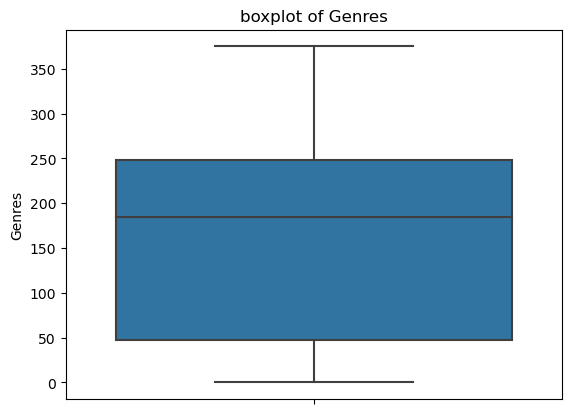

In [48]:
#TO VISUALIZE GENERES DISTRIBUTIONS
ax = sb.boxplot(data=rating_prediction, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('boxplot of Genres')
mpl.show()

In [49]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'GENERES' COLUMN
Q1 = rating_prediction['Genres'].quantile(0.25)
Q3 = rating_prediction['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = rating_prediction[(rating_prediction['Genres'] >= lower_bound) & (rating_prediction['Genres'] <= upper_bound)]

In [50]:
rating_prediction.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3326
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1112
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2075
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535


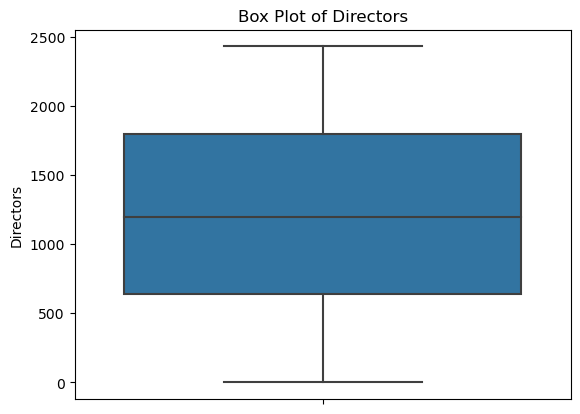

In [51]:
#TO VISUALIZE DIRECTORS DISTRIBUTIONS
ax = sb.boxplot(data=rating_prediction, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
mpl.show()

In [52]:
#TO IDENTIFY AND FILTER OUT THE OUTLIERS IN 'ACTORS' COLUMN
Q3 =rating_prediction['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
rating_prediction = rating_prediction[(rating_prediction['Actors'] >= lower_bound) & (rating_prediction['Actors'] <= upper_bound)]

In [53]:
rating_prediction.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3326
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1112
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2075
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535


In [54]:
#SPLITTING THE DATASET INTO INPUT FEATURES (x) AND OUTPUT FEATURES (y)
Input = rating_prediction.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = rating_prediction['Rating']

In [55]:
Input.head()

,Year,Duration,Votes,Directors,Genres,Actors
1,-2019.0,109,8,629,229,3858
3,-2019.0,110,35,1335,184,3326
5,-1997.0,147,827,1530,157,1112
6,-2005.0,142,1086,2044,289,2075
8,-2012.0,82,326,135,320,5535


In [56]:
Output.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

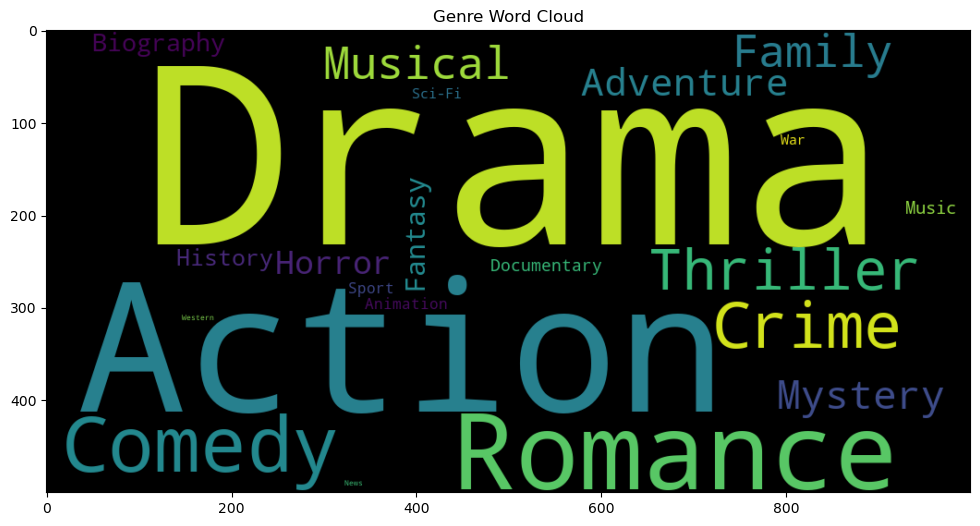

In [57]:
from wordcloud import WordCloud
genre_counts = rating_prediction['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(genre_counts)

mpl.figure(figsize=(16, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('on')
mpl.title('Genre Word Cloud')
mpl.show()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [59]:
#IMPORTING THE NECESSARY LIBARIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [61]:
#EVALUTING THE MODEL PERFORMANCE
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [62]:
#TRAINING AND TESTING THE DATA
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)
GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

from catboost import CatBoostRegressor
CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 4527, number of used features: 6
[LightGBM] [Info] Start training from score 5.910029


In [63]:
#CHECKING MODEL AND MEAN SQUARED ERROR FOR TRAINED AND TESTED DATA 
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 100.86%
Mean Squared Error = 1.29

Model:  RANDOM FOREST
Accuracy = 351.47%
Mean Squared Error = 1.10

Model:  DECEISION TREE
Accuracy = -274.43%
Mean Squared Error = 1.54

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 304.47%
Mean Squared Error = 1.13

Model:  GRADIENT BOOSTING
Accuracy = 373.54%
Mean Squared Error = 1.08

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 403.30%
Mean Squared Error = 1.05

Model:  CAT BOOST
Accuracy = 370.61%
Mean Squared Error = 1.08

Model:  K NEAREST NEIGHBORS
Accuracy = 6.78%
Mean Squared Error = 1.36

